In [38]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [39]:
num_cols = [
    'x',
    'y',
    'z'
]

cat_cols = [
    'h'
]

target_col = [
    'zone'
]

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [41]:
# X_train, X_test, y_train, y_test = train_test_split(brain_data[num_cols + cat_cols], 
#                                                    brain_data[target_col], 
#                                                    train_size=0.9, 
#                                                    random_state=21)

my_column_transformer = make_column_transformer(
    (OneHotEncoder(), cat_cols), 
    (StandardScaler(), num_cols)
)

In [42]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [43]:
svm_pipeline = make_pipeline(
    my_column_transformer, 
    SVC(max_iter=10000)
)

random_forest_pipeline = make_pipeline(
    my_column_transformer, 
    RandomForestClassifier()
)

knn_pipeline = make_pipeline(
    my_column_transformer, 
    KNeighborsClassifier()
)

In [44]:
svm_grid_search = GridSearchCV(svm_pipeline, 
                               {'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                                'svc__C': [100, 10, 1, 0.1, 0.01, 0.001]},
                               cv=5,
                               n_jobs=-1,
                               verbose=10)

In [45]:
random_forest_grid_search = GridSearchCV(random_forest_pipeline, 
                               {'randomforestclassifier__criterion': ['gini', 'entropy'],
                                'randomforestclassifier__max_depth': list(range(3,8)),
                                'randomforestclassifier__min_samples_split': list(range(2,5)),
                                'randomforestclassifier__n_estimators': [100, 125]},
                               cv=5,
                               n_jobs=-1,
                               verbose=10)

In [46]:
knn_grid_search = GridSearchCV(knn_pipeline, 
                               {'kneighborsclassifier__n_neighbors': list(range(4, 20))},
                               cv=5,
                               n_jobs=-1,
                               verbose=10)

In [47]:
def get_partition(ides, predictions, path_to_output):
    keys = np.unique(predictions)
        
    with open(path_to_output, 'w') as file:
        file.write('1\n')
        
        for key in keys:
            file.write(' '.join(map(str, ides[predictions == key])) + '\n')

In [48]:
os.system('cp ../metric/cmake-build-release/metric metric')


def draw(data, labels, title, name):
    plt.close('all')
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=90, azim=90)
    ax.scatter(data[:, 0],
               data[:, 1],
               data[:, 2],
               c=labels)
    ax.set_title(title)
    plt.savefig(name)
    plt.show()

    
def pipeline(model, points, vertex_ides, labels, model_name, path):
    predicted_labels = model.predict(points);
    get_partition(vertex_ides, predicted_labels, f'{path + os.sep + model_name}_partition.out')
    get_partition(vertex_ides, labels, f'{path + os.sep}real_partition.out')
    os.system(f'./metric -r {path + os.sep}real_partition.out '
              f'-f {path + os.sep + model_name}_partition.out '
              f'-o {path + os.sep + model_name}_metric_value')
    draw(points.iloc[:, [0, 1, 2]].to_numpy(), predicted_labels, model_name, path + os.sep + model_name)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1977s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0979s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1850s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    6.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   31.7s
[Paralle

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0489s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1989s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  64 out of  80 | elapsed:    1.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.4s finished


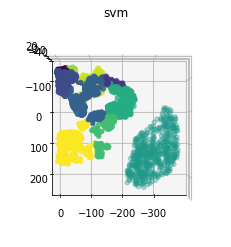

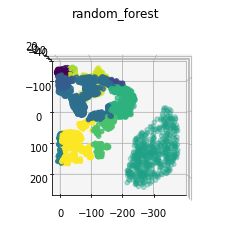

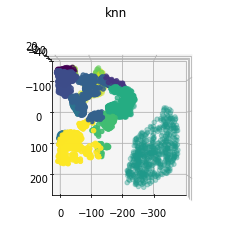

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0237s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1623s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1841s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.8s
[Paralle

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0363s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1343s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.0s finished


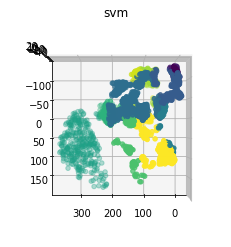

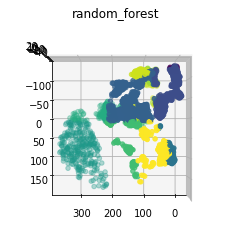

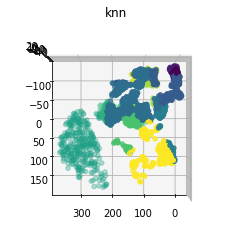

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0242s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0950s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.5s
[Paralle

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0428s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0878s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.8s finished


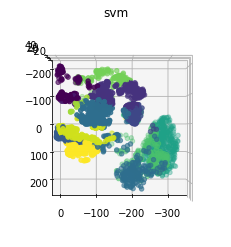

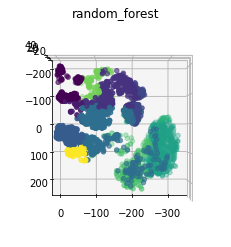

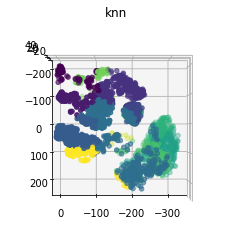

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0229s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1449s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.2s
[Paralle

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0341s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1353s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.0s finished


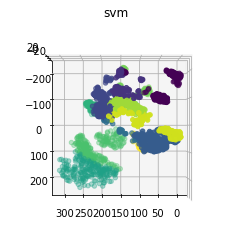

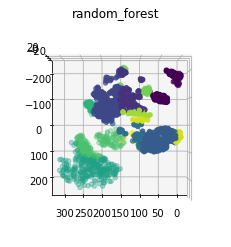

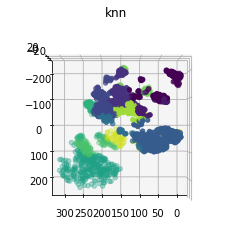

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0245s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1563s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.7s
[Paralle

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0343s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.4s finished


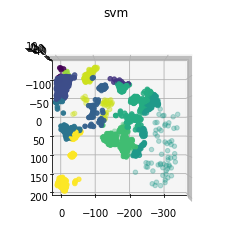

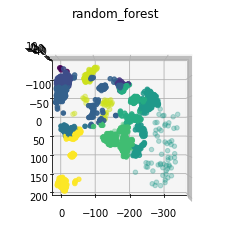

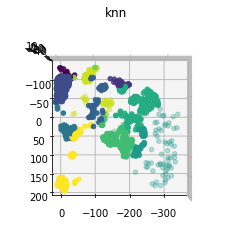

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0256s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1336s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.3s
[Paralle

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0439s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.3s finished


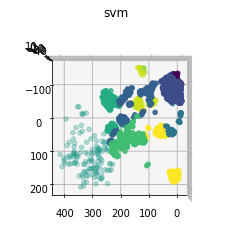

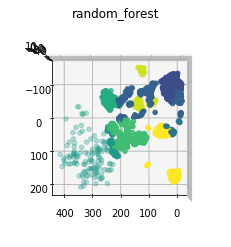

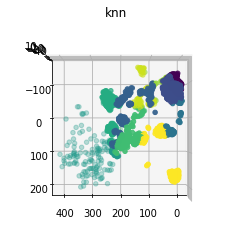

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0329s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1602s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    5.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.4s
[Paralle

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0644s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1934s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.4s finished


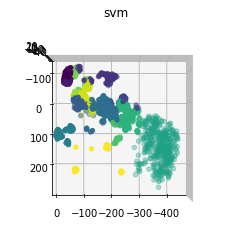

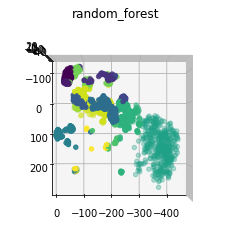

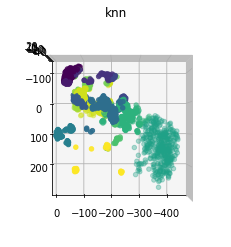

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0287s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1894s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1867s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.4s
[Paralle

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0443s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1891s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.3s finished


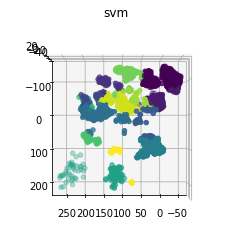

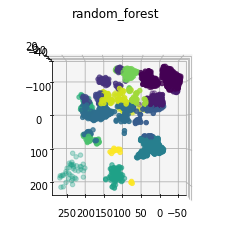

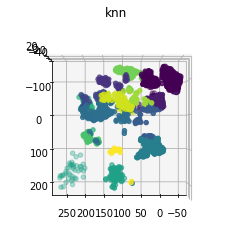

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0305s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1596s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.7s finished
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 con

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.9s
[Paralle

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0413s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1836s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.4s finished


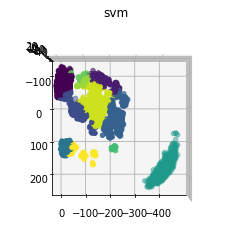

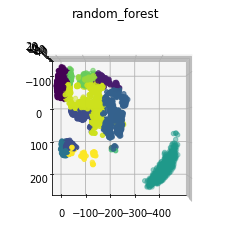

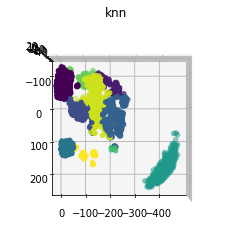

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0435s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1650s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.8s
[Paralle

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0338s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.4s finished


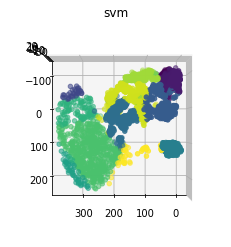

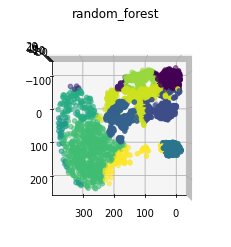

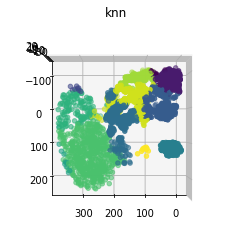

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0446s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1807s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    5.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.7s
[Paralle

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0460s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.4s finished


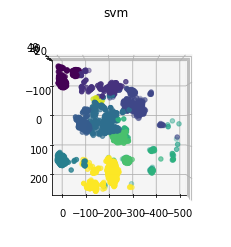

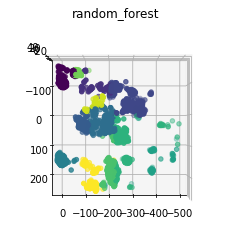

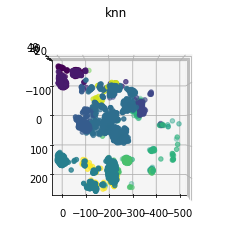

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0278s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1834s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1907s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.3s
[Paralle

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0454s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1839s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.3s finished


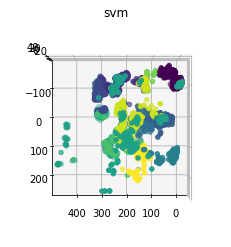

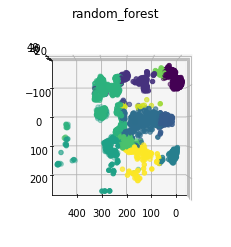

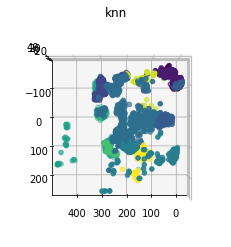

In [49]:
train_test_paths = [('../pipeline/zonetab-mel-animal-1-l', '../pipeline/zonetab-mel-animal-2-l'),
                    ('../pipeline/zonetab-mel-animal-1-r', '../pipeline/zonetab-mel-animal-2-r'),
                    ('../pipeline/zonetab-mel-animal-2-l', '../pipeline/zonetab-mel-animal-3-l'), 
                    ('../pipeline/zonetab-mel-animal-2-r', '../pipeline/zonetab-mel-animal-3-r'),
                    ('../pipeline/zonetab-mel-animal-3-l', '../pipeline/zonetab-mel-animal-2-l'), 
                    ('../pipeline/zonetab-mel-animal-3-r', '../pipeline/zonetab-mel-animal-2-r'),
                    ('../pipeline/zonetab-sim-animal-2-l', '../pipeline/zonetab-sim-animal-3-l'),
                    ('../pipeline/zonetab-sim-animal-2-r', '../pipeline/zonetab-sim-animal-3-r'),
                    ('../pipeline/zonetab-sim-animal-3-l', '../pipeline/zonetab-sim-animal-4-l'),
                    ('../pipeline/zonetab-sim-animal-3-r', '../pipeline/zonetab-sim-animal-4-r'),
                    ('../pipeline/zonetab-sim-animal-4-l', '../pipeline/zonetab-sim-animal-3-l'),
                    ('../pipeline/zonetab-sim-animal-4-r', '../pipeline/zonetab-sim-animal-3-r')]


for test_path, train_path in train_test_paths:
    train_brain_data = pd.read_csv(f'{train_path + os.sep}data.csv')
    test_brain_data = pd.read_csv(f'{test_path + os.sep}data.csv')

    ides = test_brain_data.id.values + 1

    train_brain_data = train_brain_data.loc[:, num_cols + cat_cols + target_col]
    train_brain_data['h'] = train_brain_data['h'].fillna('m')

    test_brain_data = test_brain_data.loc[:, num_cols + cat_cols + target_col]
    test_brain_data['h'] = test_brain_data['h'].fillna('m')
    
    X_train = train_brain_data.iloc[:, train_brain_data.columns != 'zone']
    y_train = train_brain_data.zone.values
    X_test = test_brain_data.iloc[:, test_brain_data.columns != 'zone']
    y_test = test_brain_data.zone.values
        
    models = {'svm': svm_grid_search.fit(X_train, y_train), 
              'random_forest': random_forest_grid_search.fit(X_train, y_train), 
              'knn': knn_grid_search.fit(X_train, y_train)}
    
    for model_name, model in models.items():
        pipeline(model, X_test, ides, y_test, model_name, test_path)